# Base

# 1. LeetCode 239. Sliding Window Maximum 滑动窗口最大值

You are given an array of integers nums, there is a sliding window of size k which is moving from the very left of the array to the very right. You can only see the k numbers in the window. Each time the sliding window moves right by one position.

Return the max sliding window.


给你一个整数数组 nums，有一个大小为 k 的滑动窗口从数组的最左侧移动到数组的最右侧。你只可以看到在滑动窗口内的 k 个数字。

滑动窗口每次只向右移动一位。返回 滑动窗口中的最大值 。


Example 1:

```
Input: nums = [1,3,-1,-3,5,3,6,7], k = 3
Output: [3,3,5,5,6,7]
Explanation: 
Window position                Max
---------------               -----
[1  3  -1] -3  5  3  6  7       3
 1 [3  -1  -3] 5  3  6  7       3
 1  3 [-1  -3  5] 3  6  7       5
 1  3  -1 [-3  5  3] 6  7       5
 1  3  -1  -3 [5  3  6] 7       6
 1  3  -1  -3  5 [3  6  7]      7
```

Example 2:

```
Input: nums = [1], k = 1
Output: [1]
```

Constraints:

- $1 <= nums.length <= 10^5$

- $-10^4 <= nums[i] <= 10^4$

- $1 <= k <= nums.length$


## 解题思路

- 給定一個數組和一個窗口為 K 的窗口，當窗口從數組的左邊滑動到數組右邊的時候，輸出每次移動窗口以後，在窗口內的最大值。

- 這道題最暴力的方法就是 2 層循環，時間複雜度 O(n * K)。

- 另一種思路是用優先隊列，每次窗口以後的時候都向優先隊列裡面新增一個節點，並刪除一個節點。時間複雜度是 O(n * log n)

- 最優的解法是用雙端隊列，隊列的一邊永遠都存的是窗口的最大值，隊列的另外一個邊存的是比最大值小的值。隊列中最大值左邊的所有值都出隊。在保證了雙端隊列的一邊即是最大值以後，時間複雜度是 O(n)，空間複雜度是 O(K)

In [1]:
class Solution(object):
    def maxSlidingWindow(self, nums, k):
        win, ret = [], []
        for i, v in enumerate(nums):
            if i >= k and win[0] <= i - k: win.pop(0)
            while win and nums[win[-1]] <= v: win.pop()
            win.append(i)
            if i >= k - 1: ret.append(nums[win[0]])
        return ret
# 思路：维护窗口，向右移动时左侧超出窗口的值弹出，
# 因为需要的是窗口内的最大值，
# 所以只要保证窗口内的值是递减的即可，小于新加入的值全部弹出。
# 最左端即为窗口最大值 python解法：
x = [1,3,-1,-3,5,3,6,7]
kn = 3
ob = Solution()
print(ob.maxSlidingWindow(x, kn))

[3, 3, 5, 5, 6, 7]


```java
/*
  思路： 遍历数组 L R 为滑窗左右边界 只增不减
        双向队列保存当前窗口中最大的值的数组下标 双向队列中的数从大到小排序，
        新进来的数如果大于等于队列中的数 则将这些数弹出 再添加
        当R-L+1=k 时 滑窗大小确定 每次R前进一步L也前进一步 保证此时滑窗中最大值的
        数组下标在[L，R]中，并将当前最大值记录
  举例： nums[1，3，-1，-3，5，3，6，7] k=3
     1：L=0，R=0，队列【0】 R-L+1 < k
            队列代表值【1】
     2: L=0,R=1, 队列【1】 R-L+1 < k
            队列代表值【3】
     解释：当前数为3 队列中的数为【1】 要保证队列中的数从大到小 弹出1 加入3
          但队列中保存的是值对应的数组下标 所以队列为【1】 窗口长度为2 不添加记录
     3: L=0,R=2, 队列【1，2】 R-L+1 = k ,result={3}
            队列代表值【3，-1】
     解释：当前数为-1 队列中的数为【3】 比队列尾值小 直接加入 队列为【3，-1】
          窗口长度为3 添加记录记录为队首元素对应的值 result[0]=3
     4: L=1,R=3, 队列【1，2，3】 R-L+1 = k ,result={3，3}
            队列代表值【3，-1,-3】
     解释：当前数为-3 队列中的数为【3，-1】 比队列尾值小 直接加入 队列为【3，-1，-3】
          窗口长度为4 要保证窗口大小为3 L+1=1 此时队首元素下标为1 没有失效
          添加记录记录为队首元素对应的值 result[1]=3
     5: L=2,R=4, 队列【4】 R-L+1 = k ,result={3，3，5}
            队列代表值【5】
     解释：当前数为5 队列中的数为【3，-1，-3】 保证从大到小 依次弹出添加 队列为【5】
          窗口长度为4 要保证窗口大小为3 L+1=2 此时队首元素下标为4 没有失效
          添加记录记录为队首元素对应的值 result[2]=5
    依次类推 如果队首元素小于L说明此时值失效 需要弹出
*/
class Solution {
    public int[] maxSlidingWindow(int[] nums, int k) {
        if(nums==null||nums.length<2) return nums;
        // 双向队列 保存当前窗口最大值的数组位置 保证队列中数组位置的数按从大到小排序
        LinkedList<Integer> list = new LinkedList();
        // 结果数组
        int[] result = new int[nums.length-k+1];
        for(int i=0;i<nums.length;i++){
            // 保证从大到小 如果前面数小 弹出
            while(!list.isEmpty()&&nums[list.peekLast()]<=nums[i]){
                list.pollLast();
            }
            // 添加当前值对应的数组下标
            list.addLast(i);
            // 初始化窗口 等到窗口长度为k时 下次移动在删除过期数值
            if(list.peek()<=i-k){
                list.poll();   
            } 
            // 窗口长度为k时 再保存当前窗口中最大值
            if(i-k+1>=0){
                result[i-k+1] = nums[list.peek()];
            }
        }
        return result;
    }
}
```

# 2. LeetCode 15. 3Sum 三数之和

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.



给你一个整数数组 nums，有一个大小为 k 的滑动窗口从数组的最左侧移动到数组的最右侧。你只可以看到在滑动窗口内的 k 个数字。

滑动窗口每次只向右移动一位。返回 滑动窗口中的最大值 。


Example 1:

```
Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]
```

Example 2:

```
Input: nums = []
Output: []
```

Example 3:

```
Input: nums = [0]
Output: []
```

Constraints:

- 0 <= nums.length <= 3000
- -10^5 <= nums[i] <= 10^5


## 解题思路

用 map 提前计算好任意 2 个数字之和，保存起来，可以将时间复杂度降到 O(n^2)。这一题比较麻烦的一点在于，最后输出解的时候，要求输出不重复的解。数组中同一个数字可能出现多次，同一个数字也可能使用多次，但是最后输出解的时候，不能重复。例如 [-1，-1，2] 和 [2, -1, -1]、[-1, 2, -1] 这 3 个解是重复的，即使 -1 可能出现 100 次，每次使用的 -1 的数组下标都是不同的。

这里就需要去重和排序了。map 记录每个数字出现的次数，然后对 map 的 key 数组进行排序，最后在这个排序以后的数组里面扫，找到另外 2 个数字能和自己组成 0 的组合。

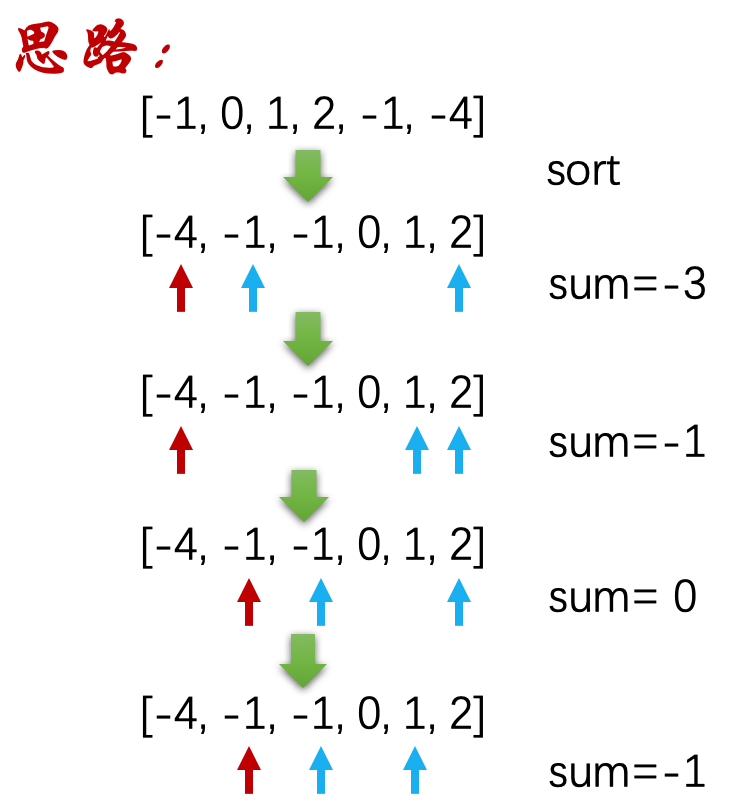

In [2]:
class Solution(object):
    def threeSum(self, nums):
        if len(nums) < 3:
            return[]
        if all (num == 0 for num in nums):
            return [[ 0, 0, 0]]
        found = []
        nums = sorted(nums)
        rightmost = len(nums) - 1
        for index, eachNum in enumerate(nums):
            left = index + 1
            right = rightmost
            while left < right:
                check_sum = (eachNum + nums[left] + nums[right])
                if check_sum == 0:
                    new_found = [eachNum, nums[left], nums[right]]
                    if new_found not in found:
                        found.append(new_found)
                    right -= 1
                elif check_sum < 0:
                    left += 1
                else :
                    right -= 1
        return found

## 複雜度低版本
class Solution2(object):
    def threeSum(self, nums):
        if len(nums) < 3:
            return []
        if all (num == 0 for num in nums):
            return [[0, 0, 0]]
        found = []
        nums = sorted(nums)
        rightmost = len(nums) - 1
        for index, eachNum in enumerate(nums):
            if index > 0 and nums[index] == nums[index - 1]:
                continue
            left = index + 1
            right = rightmost
            while left < right:
                check_sum = (eachNum + nums[left] + nums[right])
                if check_sum == 0:
                    found.append([eachNum, nums[left], nums[right]])
                    left += 1
                    while left < right and nums[left] == nums[left - 1]:
                        left += 1
                elif check_sum < 0:
                    left += 1
                else :
                    right -= 1
        return found

# 3. 查找, Search, 搜索, 搜尋

- 順序查找

- `*` 二分查找

-  Hash 查找

# 4. Search 名詞釋疑

> 整理於台灣義守大學與維基百科


## 雜湊 (Hash), 哈希

雜湊是因為他的特性很適合來做加密的運算，但真的不等同於加密。

> 雜湊（英語：Hashing）是電腦科學中一種對資料的處理方法，通過某種特定的函式/演算法（稱為雜湊函式/演算法）將要檢索的項與用來檢索的索引（稱為雜湊，或者雜湊值）關聯起來，生成一種便於搜尋的資料結構（稱為雜湊表）。舊譯哈希（誤以為是人名而採用了音譯）。它也常用作一種資訊安全的實作方法，由一串資料中經過雜湊演算法（Hashing algorithms）計算出來的資料指紋（data fingerprint），經常用來識別檔案與資料是否有被竄改，以保證檔案與資料確實是由原創者所提供。
>
> 如今，雜湊演算法也被用來加密存在資料庫中的密碼（password）字串，由於雜湊演算法所計算出來的雜湊值（Hash Value）具有不可逆（無法逆向演算回原本的數值）的性質，因此可有效的保護密碼。

## 雜湊函數 (Hash function)

主要是將不定長度訊息的輸入，演算成固定長度雜湊值的輸出，且所計算出來的雜湊值必須符合兩個主要條件：

由雜湊值是無法反推出原來的訊息
雜湊值必須隨明文改變而改變。
舉例來說，雜湊函數就像一台果汁機，我們把蘋果香蕉你個芭樂 (資料) 都丟進去打一打、攪一攪，全部變得爛爛的很噁心對吧？！這時候出來的產物 (經過雜湊函數後的值)，是獨一無二的，沒有辦法反向組合成原來的水果 (資料)。倘若我們把蘋果改成紅龍果，出來的產物 (經過雜湊函數後的值) 就會跟著改變，變成桃紅色的，不再是原來的淡黃色。

承上述的例子，用紅龍果香蕉你個芭樂經過雜湊函數出來的顏色是桃紅色 (雜湊值)，那有沒有可能我用其他的水果也可以打出相同的顏色呢？但因為雜湊值的特性是無法反推的，所以如果真的打出相同的顏色的話，我們稱為碰撞 (Collision)。這就代表說這個雜湊值已經不安全，不再是獨一無二的了，需要更改雜湊函數。

## 雜湊表 (Hash table)

在用雜湊函數運算出來的雜湊值，根據 鍵 (key) 來儲存在數據結構中。而存放這些記錄的數組就稱為 雜湊表。


## 搜尋(Search)

搜尋就是在一堆資料中找出所要之特定資料。搜尋之主要核心動作為「比較」動作，必需透過比較才有辦法判斷是否尋找到特定資料。當資料量少時很容易，當資料量龐大時，如何快速搜尋為一重要課題。

一般電腦檔案都是一群結構記錄之集合(如上一單元之成績結構)。為了排序與搜尋，至少會設定其中一個欄位為資料之鍵值(key)。透過鍵值將資料排列順序，稱為排序。透過鍵值找到特定資料，稱為搜尋(search)。一般資料搜尋有下列分類：

## 依資料量大小

1. 內部搜尋：欲搜尋之資料較少，可直接載入記憶體中，進行搜尋動作。

2. 外部搜尋：欲搜尋之資料較多，無法一次載入記憶體進行搜尋動作。需使用外部輔助記憶體分批處理。

## 依搜尋時資料表格是否異動

1. 靜態搜尋：搜尋過程中，資料表格不會有任何異動(如：新增、刪除或更新)。例如：查閱紙本字典、電話簿。

2. 動態搜尋：搜尋過程中，資料表格會經常異動。

一般搜尋常見之演算法有，「循序搜尋」、「二分搜尋」、「二元樹搜尋」、「雜湊搜尋」。

## 循序搜尋法 (Sequential Search)

【定義】從第一個資料開始取出，依序一一與「目標資料」相互比較，直到找到所要元素或所有資料均尋找完為止，此方法稱「循序搜尋」。

【優點】(1) 程式容易撰寫。(2) 資料不須事先排序(Sorting)。

【缺點】 搜尋效率比較差(平均次數=(N+1)/2)，不管是否有排序，每次都必須要從頭到尾找一次。

【時間複雜度】

(1) 如果資料沒有重覆，找到資料就可終止，否則要找到資料結束。N筆資料，在最差之情況下，需作 N 次比較，O(N)。

(2) 在平均狀況下(假設資料出現與分佈之機率相等)需(N+1)/2次比較，所以平均時間與最差時間為O(N)，最好為O(1)=1次。

【演算法】

```c
int sequential_search(int list[], int n, int key) {
    int i;
    for (i = 0; i < n; i++){
        if (list[i] == key) return i+1;
        //比對陣列內的資料是否等於欲搜尋的條件
        //若找到符合條件的資料，就傳回其索引
    }
    return(-1);    
    //若找不到符合條件的資料，就傳回 -1
}
```
## 二分搜尋法 (Binary Search)

【定義】如果資料已先排序過，則可使用二分法來進行搜尋。二分法是將資料分成兩部份，再將鍵值與中間值比較，如鍵值相等則找到，小於再比前半段，大於再比後半段。如此，分段比較至找到或無資料為止。

【優點】搜尋效率佳(平均次數=Log2N)。

【缺點】 (1) 資料必需事先排序。(2) 檔案資料必需使是可直接存取或隨機檔。

【時間複雜度】因為每次比較都會比上一次少一半之資料，因此最多只需要比較。

【演算法】

```c
    Searchtime = 0;                   //搜尋次數初值設定為
    Middle = (int)((Low + High)/2);   //搜尋中間值
    do {
        Searchtime = Searchtime + 1;
        if (Temp[Middle] == Key)       //找到資料
        {
            printf("該數字是排在第 %d 個順位",Middle);
            //顯示資料位置
            printf("一共搜尋 %d 次",Searchtime);
            //顯示搜尋次數
            break;    //跳出迴圈
        }
        else if(Temp[Middle] < Key)
                Low = Middle + 1;          //改變左半部
            else  High = Middle - 1;     //改變右半部
        Middle = (int)((Low + High) / 2);  //改變中間值
    }
    while(Low <= High);
```

## 二元樹搜尋法 (Tree Search)

【定義】二元數是先將資料列建立為一棵二元搜尋樹，樹中每節點皆不小於左子樹(葉)，也不大於右子樹(葉)，也就是 左子樹的值≦樹根值≦右子樹的值。

【優點】 (1) 插入與刪除時，只需改變指標。(2) 二元樹效率較高(介於循序法與二分法間)。

【缺點】 (1) 有左、右兩指標，需較大記憶體空間。(2) 資料必須事先排序。

【時間複雜度】平均與最差時間為 O(N)

## 內插搜尋法(Interpolation Search)

【定義】內插搜尋法是二分搜尋法之改良版。是依照資料位置分佈，運用公式預測資料所在位置，再以二分法方式逼近。內插之預測公式為：

【優點】資料分佈平均時，搜尋速度極快。

【缺點】 (1) 需計算預測公式。(2) 資料必須事先排序。

【時間複雜度】取決於資料分部情形，平均而言優於 Log2N。

【演算法】
```c
int intsrch(int A[], int find) {
    int low, mid, high,Searchtime;
    low = 0;
    high = MAX - 1;
    Searchtime = 0;// 搜尋次數初值設定為
    while(low <= high) {
        mid = (high-low)* (find-A[low])/(A[high]-A[low])+ low;
        Searchtime = Searchtime + 1;   
        if(mid < low || mid > high)  return -1;
        if(find < A[mid])   high = mid - 1;
        else if(find > A[mid])
            low = mid + 1;
        else {
            printf("一共搜尋 %d 次, ",Searchtime);//顯示搜尋次數
            return mid;
        }
    }
    return -1;
}
```
## 雜湊搜尋法(Hashing Search)

存取資料時，並不依資料順序存取，是應用資料中某欄位之值代入事先設計好之函數(雜湊函數)，計算資料存放之位置。這種方式稱雜湊法(Hashing)。

【定義】將資料按照某特定法則轉換為資料儲存位置，應用時是以資料鍵值(key value)轉換。

【優點】 

(1) 搜尋速度最快。

(2) 資料不須是先排序。

(3) 在沒發生碰撞(collision)與溢位(overflow)之情況下，只需一次即可讀取。

(4) 搜尋速度與資料量大小無關。

(5) 保密性高，若不知雜湊函術，無法取得資料。

【缺點】 

(1) 浪費空間(因有溢位資料區)，並且儲存空間的利用率比循序檔差。

(2) 有碰撞問題，當資料檔記錄到一定量時會嚴重影響處理速度存取速度。

(3) 程式設計比較複雜。

(4) 大量資料無效率。

(5) 不適合循序型煤體，如磁帶。

【演算法】主要依雜湊函數之計算、碰撞與溢位為考量依據。以下簡單討論幾種雜湊函數與溢位處理方法。

## Reference

1. https://en.wikipedia.org/wiki/Search_algorithm

2. https://ithelp.ithome.com.tw/articles/10208884

3. https://en.wikipedia.org/wiki/Hash_function

4. https://zh.wikipedia.org/wiki/%E6%95%A3%E5%88%97%E5%87%BD%E6%95%B8


In [3]:
15 in [3, 5, 2, 4, 1]

False

In [4]:
3 in [3, 5, 2, 4, 1]

True

# 5. 顺序查找, 循序搜尋法, Sequential Search

從第一個資料開始取出，依序與「目標資料」相互比較，直到找到所要元素或所有資料均尋找完為止，此方法稱「循序搜尋」。

In [5]:
# KP
def squentialSearch(alist, item):
    pos = 0
    found = False
    while pos < len(alist) and not found:
        if alist[pos] == item:
            found = True
        else :
            pos = pos + 1
    return found
testlist = [1, 2, 32, 8, 17, 19, 42, 13, 0]
print(squentialSearch(testlist, 3))
print(squentialSearch(testlist, 13))

False
True


In [6]:
# KP
def orderedSeqentialSearch(alist, item):
    pos = 0
    found = False
    stop = False
    while pos < len(alist) and not found and not stop:
        if alist[pos] == item:
            found = True
        else :
            if alist[pos] > item:
                stop = True
            else :
                pos = pos + 1
    return found
testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42]
print(orderedSeqentialSearch(testlist, 3))
print(orderedSeqentialSearch(testlist, 13))

False
True


# 6. 二分查找, 二分搜尋法, Binary Search

In [7]:
# KP
# 二分查找
def binarySearch(alist, item):
    first = 0
    last = len(alist) -1
    found = False
    while first <= last and not found:
        midpoint = (first + last) // 2
        if alist[midpoint] == item:
            found = True
        else:
            if item < alist[midpoint]:
                last = midpoint - 1
            else :
                first = midpoint + 1
    return found
testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42]
print(binarySearch(testlist, 3))
print(binarySearch(testlist, 13))

False
True


In [8]:
# KP
# 二分查找
# 遞歸
def binarySearch(alist, item):
    if len(alist) == 0:
        return False
    else:
        midpoint = len(alist)//2
        if alist[midpoint] == item:
            return True
        else:
            if item < alist[midpoint]:
                return binarySearch(alist[:midpoint], item)
            else :
                return binarySearch(alist[midpoint + 1:], item)

testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42]
print(binarySearch(testlist, 3))
print(binarySearch(testlist, 13))

False
True


# 7. Hash 查找, 雜湊搜尋法, Hashing Search

存取資料時，並不依資料順序存取，是應用資料中某欄位之值代入事先設計好之函數(雜湊函數)，計算資料存放之位置。這種方式稱雜湊法(Hashing)。

- 簡單餘數法

- 分組求和法

- 平方取中法

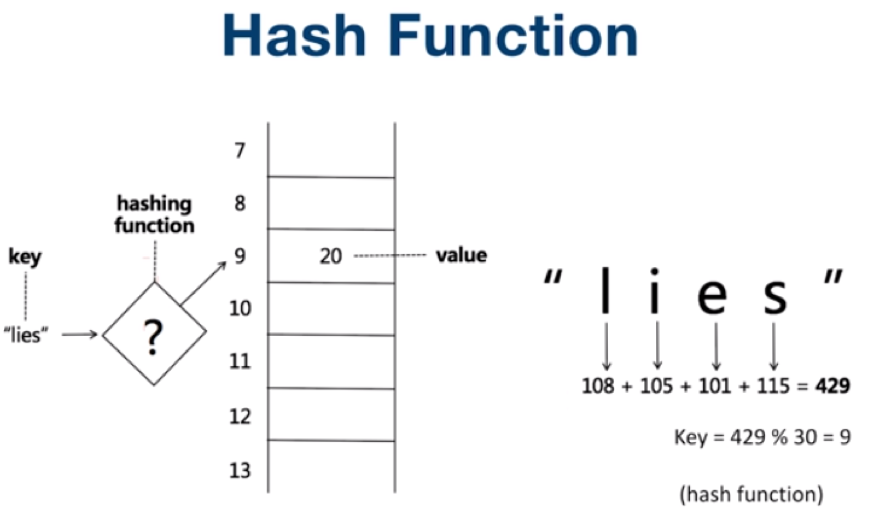

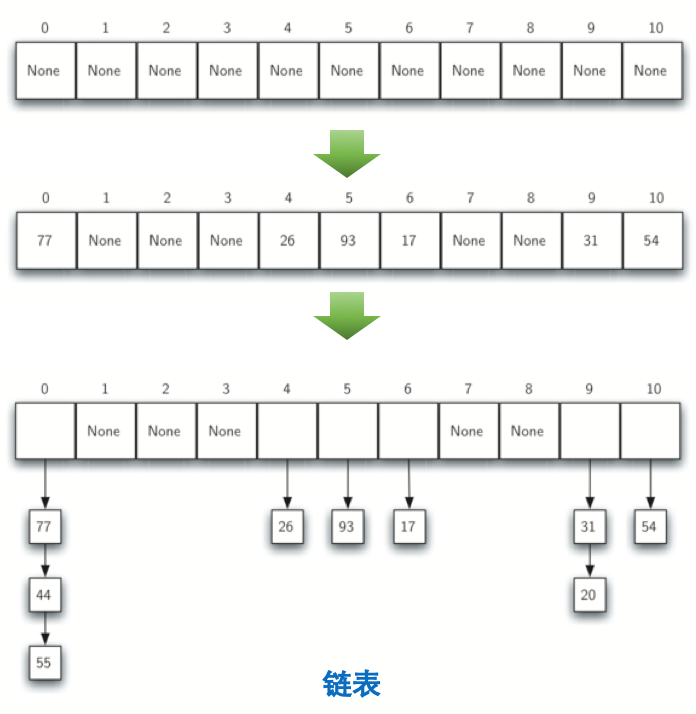

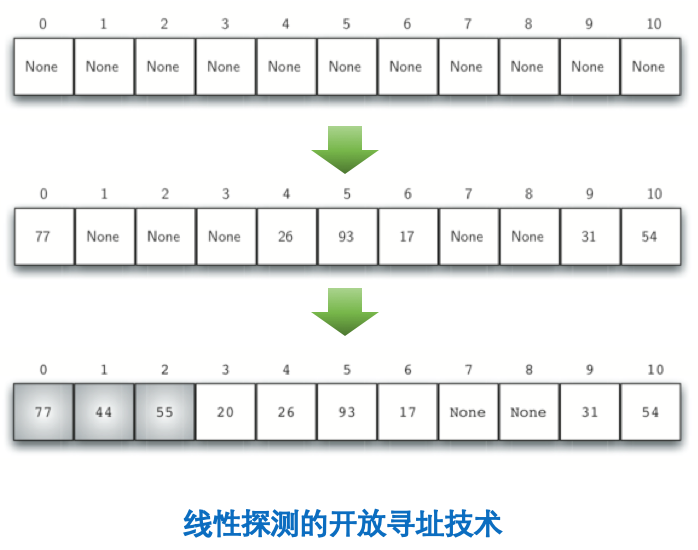

# 衝突 & List & 線性探測的開放尋址技術

## e.g. [ 54, 26, 93, 17, 77, 31, 44, 55, 20]

# 8. Map 抽象数据类型

- Map() 创建一个新的 map 。它返回一个空的 map 集合。

- put(key, val) 向 map 中添加一个新的键值对。如果键已经在 map 中，那么用新值替换旧值。

- get(key) 给定一个键，返回存储在 map 中的值或 None。

- del 使用 `del map[key]` 形式的语句从 map 中删除键值对。

- len() 返回存储在 map 中的键值对的数量。

- in 返回 True 对于 `key in map` 语句，如果给定的键在 map 中，否则为False。

最有用的 Python 集合之一是字典。

回想一下，字典是一种关联数据类型，你可以在其中存储键-值对。该键用于查找关联的值。我们经常将这个想法称为 `map`。

map 抽象数据类型定义如下。该结构是键与值之间的关联的无序集合。

map 中的键都是唯一的，因此键和值之间存在一对一的关系。

字典一个很大的好处是，给定一个键，我们可以非常快速地查找相关的值。

为了提供这种快速查找能力，我们需要一个支持高效搜索的实现。

我们可以使用具有顺序或二分查找的列表，但是使用如上所述的哈希表将更好，因为查找哈希表中的项可以接近 $O(1)$ 性能

In [9]:
class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size
    def put(self, key, data):
        hashvalue = self.hashfunction(key, len(self.slots))
        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
        else:
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data  # replace
            else:
                nextslot = self.rehash(hashvalue, len(self.slots))
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    nextslot = self.rehash(nextslot, len(self.slots))
                if self.slots[nextslot] == None:
                    self.slots[nextslot] = key
                    self.data[nextslot] = data
                else:
                    self.data[nextslot] = data  # replace
    def hashfunction(self, key, size):
        return key % size
    def rehash(self, oldhash, size):
        return (oldhash + 1) % size
    def get(self, key):
        startslot = self.hashfunction(key, len(self.slots))
        data = None
        stop = False
        found = False
        position = startslot
        while self.slots[position] != None and not found and not stop:
            if self.slots[position] == key:
                found = True
                data = self.data[position]
            else:
                position = self.rehash(position, len(self.slots))
                if position == startslot:
                    stop = True
        return data
    def __getitem__(self, key):
        return self.get(key)
    def __setitem__(self, key, data):
        self.put(key, data)

H = HashTable()
H[54] = "cat"
H[26] = "dog"
H[93] = "lion"
H[17] = "tiger"
H[77] = "bird"
H[31] = "cow"
H[44] = "goat"
H[55] = "pig"
H[20] = "chicken"
print(H.slots)
print(H.data)

[77, 44, 55, 20, 26, 93, 17, None, None, 31, 54]
['bird', 'goat', 'pig', 'chicken', 'dog', 'lion', 'tiger', None, None, 'cow', 'cat']


# 9. 递归与分治

story = function (){
    从前有个山，
    山里有个庙，
    庙里有个和尚讲故事 story()
}
 
> 从前有个山，山里有个庙，庙里有个和尚讲故事，而故事是从前有个山，山里有个庙，庙里有个和尚讲故事


# 10. 递归

```c
def recursion(level, param1, param2, ...):
    # recursion terminator
    if level > MAX_LEVEL:
        print_result
        return
    # process logic in current level
    process_data(level, data ...)

    # drill down
    self.recursion(level + 1, p1, p2, ...)

    # reverse the current status if needed
    reverse_state(level)
```

In [10]:
def recursion(level, param1, param2):
    # recursion terminator
    if level > MAX_LEVEL:
        print_result
        return
    # process logic in current level
    process_data(level, data)

    # drill down
    self.recursion(level + 1, p1, p2)

    # reverse the current status if needed
    reverse_state(level)

## 递归 計算 n 的階乘 n!

$n! = 1 * 2 * 3 * ... * n$

In [11]:
def Factorial(n):
    if n <= 1:
        return 1
    return n * Factorial(n - 1)

# 11. LeetCode 50. Pow(x, n)

Implement pow(x, n), which calculates x raised to the power n (i.e., $x^n$).

实现 pow(x, n) ，即计算 x 的 n 次幂函数（即，$x^n$ ）。


Example 1:

```
Input: x = 2.00000, n = 10
Output: 1024.00000
```

Example 2:

```
Input: x = 2.10000, n = 3
Output: 9.26100
```

Example 3:

```
Input: x = 2.00000, n = -2
Output: 0.25000
Explanation:$ 2^{-2} = {1/2}^{2} = 1/4 = 0.25$
```

Constraints:

- $-100.0 < x < 100.0$
- $-2^{31} <= n <= 2^{31}-1$
- $-10^4 <= x^n <= 10^4$

## 解题思路

要求计算 Pow(x, n)

这一题用递归的方式，不断的将 n 2 分下去。注意 n 的正负数，n 的奇偶性。

In [12]:
# KP
# LC 50 Pow(x, n)

# 递归
def myPow(x, n):
    if not n:
        return 1
    if n < 0:
        return 1/ myPow(x, -n)
    if n % 2:
        return x * myPow(x, n - 1)
    return myPow(x * x, n / 2)

In [13]:
# 非递归
def myPow2(x, n):
    if n < 0:
        x = 1 / x
        n = -n
    pow = 1
    while n:
        if n & 1:
            pow *= x
        x *= x
        n >>= 1
    return pow

# 12. 排序

- 冒泡排序

- 选择排序

- 归并排序

- 快速排序

- 插入排序

# 13. 排序


- 冒泡排序, 氣泡排序法, Bubble Sort

又稱交換排序法，原理是從第一筆資料開始，逐一比較相鄰兩筆資料，如果兩筆大小順序有誤則做交換，反之則不動，接者再進行下一筆資料比較，所有資料比較完第1回合後，可以確保最後一筆資料是正確的位置。


- 选择排序, 選擇排序法, Selection Sort

原理是反覆從未排序數列中找出最小值，將它與左邊的數做交換。可以有兩種方式排序，一為由大到小排序時，將最小值放到末端;若由小到大排序時，則將最小值放到前端。例如:未排序的數列中找到最小值的資料，和第1筆資料交換位置，再從剩下未排序的資料列中找到最小值的資料，和第2筆資料交換位置，以此類推。


- 归并排序, 合併排序法, Merge Sort

原理是會先將原始資料分割成兩個資料列，接著再將兩個資料繼續分割成兩個資料列，依此類推，直到無法再分割，也就是每組都只剩下一筆資料時，再兩兩合併各組資料，合併時也會進行該組排序，每次排序都是比較最左邊的資料，將較小的資料加到新的資料列中，依此類推，直到最後合併成一個排序好的資料列為止。


- 快速排序, 快速排序法, Quick Sort

又稱分割交換排序法，是目前公認效率極佳的演算法，使用了分治法(Divide and Conquer)的概念。原理是先從原始資料列中找一個基準值(Pivot)，接著逐一將資料與基準值比較，小於基準值的資料放在左邊，大於基準值的資料放在右邊，再將兩邊區塊分別再找出基準值，重複前面的步驟，直到排序完為止。


- 插入排序, 插入排序法, Insertion Sort

原理是逐一將原始資料加入已排序好資料中，並逐一與已排序好的資料作比較，找到對的位置插入。例如:已有2筆排序好資料，將第3筆資料與前面已排序好的2筆資料作比較，找到對的位置插入，再將第4筆資料與前面已排序好的3筆資料作比較，找到對的位置插入，以此類推。

氣泡排序法 - Bubble Sort : https://ithelp.ithome.com.tw/articles/10276184

選擇排序法 - Selection Sort : https://ithelp.ithome.com.tw/articles/10276719

合併排序法 - Merge Sort : https://ithelp.ithome.com.tw/articles/10278179

快速排序法 - Quick Sort : https://ithelp.ithome.com.tw/articles/10278644

插入排序法 - Insertion Sort : https://ithelp.ithome.com.tw/articles/10277360

## 相同結果，不同寫法

```
# method 1
temp = alist[i]
alistp[i] = alist[i + 1]
alist[i + 1] = temp

# method 2
alist[i], alist[i + 1] = alist[i + 1], alist[i]
```

In [14]:
# KP
# 冒泡排序
# code
def bubbleSort(alist):
    for passnum in range(len(alist) -1, 0, -1):
        for i in range(passnum):
            if alist[i] > alist[i + 1]:
                temp = alist[i]
                alist[i] = alist[i + 1]
                alist[i + 1] = temp
alist = [54, 26, 93, 17, 77, 31, 44, 55, 20]
bubbleSort(alist)
print(alist)

# Run Test
def bubbleSort(alist):
    for passnum in range(len(alist)-1, 0, -1):
        print(passnum)
        for i in range(passnum):
            if alist[i] > alist[i + 1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp
            print(alist)

alist = [54, 26, 93, 17]
print("bubbleSort :")
print(alist)
bubbleSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]
bubbleSort :
[54, 26, 93, 17]
3
[26, 54, 93, 17]
[26, 54, 93, 17]
[26, 54, 17, 93]
2
[26, 54, 17, 93]
[26, 17, 54, 93]
1
[17, 26, 54, 93]
[17, 26, 54, 93]


In [15]:
# KP
# 选择排序

def selectionSort(alist):
    for fillslot in range(len(alist) - 1, 0, -1):
        positionOfMax = 0
        for location in range(1, fillslot + 1):
            if alist[location] > alist[positionOfMax]:
                positionOfMax = location
        temp = alist[fillslot]
        alist[fillslot] = alist[positionOfMax]
        alist[positionOfMax] = temp
alist = [ 54, 26, 93, 17, 77, 31, 44, 55 ,20]
selectionSort(alist)
print(alist)

# Run Test
def selectionSort(alist):
    for fillsolt in range(len(alist)-1,0,-1):
        print(fillsolt)
        positionOfMax = 0
        for location in range(1, fillsolt + 1):
            if alist[location] > alist[positionOfMax]:
                positionOfMax = location
        temp = alist[fillsolt]
        alist[fillsolt] = alist[positionOfMax]
        alist[positionOfMax] = temp
        print(alist)

print("selectionSort : ")
alist = [54, 26, 93, 17]
print(alist)
selectionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]
selectionSort : 
[54, 26, 93, 17]
3
[54, 26, 17, 93]
2
[17, 26, 54, 93]
1
[17, 26, 54, 93]
[17, 26, 54, 93]


In [16]:
# KP
# 归并排序
def mergeSort(alist):
    if len(alist) > 1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        mergeSort(lefthalf)
        mergeSort(righthalf)
        l, j, k = 0,0,0
        while i < len(lefthalf) and j < len (righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k] = lefthalf[i]
                i = i + 1
            else :
                alist[k] = righthalf[j]
                j = j + 1
            k = k + 1
        while i < len(lefthalf):
            alist[k] = lefthalf[i]
            i = i + 1
            k = k + 1
        while j < len(righthalf):
            alist[k] = righthalf[j]
            j = j + 1
            k = k + 1

k = 0
def mergeSort(alist):
    global k
    k = k + 1
    print("invoke function %d" %(k))
    print("Splitting ", alist)
    if len(alist) > 1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        mergeSort(lefthalf)
        mergeSort(righthalf)
        i, j, k = 0,0,0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k] = lefthalf[i]
                i = i + 1
            else:
                alist[k] = righthalf[j]
                j = j + 1
            k = k + 1
        while i < len(lefthalf):
            alist[k] = lefthalf[i]
            i = i + 1
            k = k + 1
        while j < len(righthalf):
            alist[k] = righthalf[j]
            j = j + 1
            k = k + 1
    print("Merging ", alist)
print("mergeSort : ")
alist = [ 54, 26, 93, 17]
print(alist)
mergeSort(alist)
print(alist)

mergeSort : 
[54, 26, 93, 17]
invoke function 1
Splitting  [54, 26, 93, 17]
invoke function 2
Splitting  [54, 26]
invoke function 3
Splitting  [54]
Merging  [54]
invoke function 4
Splitting  [26]
Merging  [26]
Merging  [26, 54]
invoke function 3
Splitting  [93, 17]
invoke function 4
Splitting  [93]
Merging  [93]
invoke function 5
Splitting  [17]
Merging  [17]
Merging  [17, 93]
Merging  [17, 26, 54, 93]
[17, 26, 54, 93]


In [17]:
# KP
# 插入排序

def insertionSort(alist):
    for index in range(1, len(alist)):
        currentvalue = alist[index]
        position = index
        while position > 0 and alist[position - 1] > currentvalue:
            alist[position] = alist[position - 1]
            position = position - 1
        alist[position] = currentvalue
alist = [ 54, 26, 93, 17, 77, 31, 44, 55, 20]
insertionSort(alist)
print(alist)

def insertionSort(alist):
    for index in range(1, len(alist)):
        print(index)
        currentvalue = alist[index]
        position = index
        while position > 0 and alist[position - 1] > currentvalue:
            alist[position] = alist[position - 1]
            position = position - 1
        alist[position] = currentvalue
        print(alist)
print("insertionSort : ")
alist = [54, 26, 93, 17]
print(alist)
insertionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]
insertionSort : 
[54, 26, 93, 17]
1
[26, 54, 93, 17]
2
[26, 54, 93, 17]
3
[17, 26, 54, 93]
[17, 26, 54, 93]


In [18]:
# KP
# 快速排序

def quickSort(alist):
    quickSortHelper(alist, 0, len(alist)-1)
def quickSortHelper(alist, first, last):
    if first < last:
        splitpoint = partition(alist, first, last)
        quickSortHelper(alist, first, splitpoint-1)
        quickSortHelper(alist, splitpoint+1, last)
def partition(alist,first,last):
    pivotvalue = alist[first]
    leftmark = first+1
    rightmark = last
    done = False
    while not done:
        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1
        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp
    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp
    return rightmark


alist = [54,26,93,17,77,31,44,55,20]
print(alist)
quickSort(alist)
print(alist)

[54, 26, 93, 17, 77, 31, 44, 55, 20]
[17, 20, 26, 31, 44, 54, 55, 77, 93]


# Reference

http://pages.di.unipi.it/marino/pythonads/SortSearch/TheQuickSort.html

# 14. 貪心法

贪心法，又称贪心算法、贪婪算法:在对问题求解时， 总是做出在当前看来是最好的选择。

简单地说，问题能够分解成子问题来解决，子问题的 最优解能递推到最终问题的最优解。这种子问题最优 解成为最优子结构。

# 15. 貪心法 - 找最少硬币

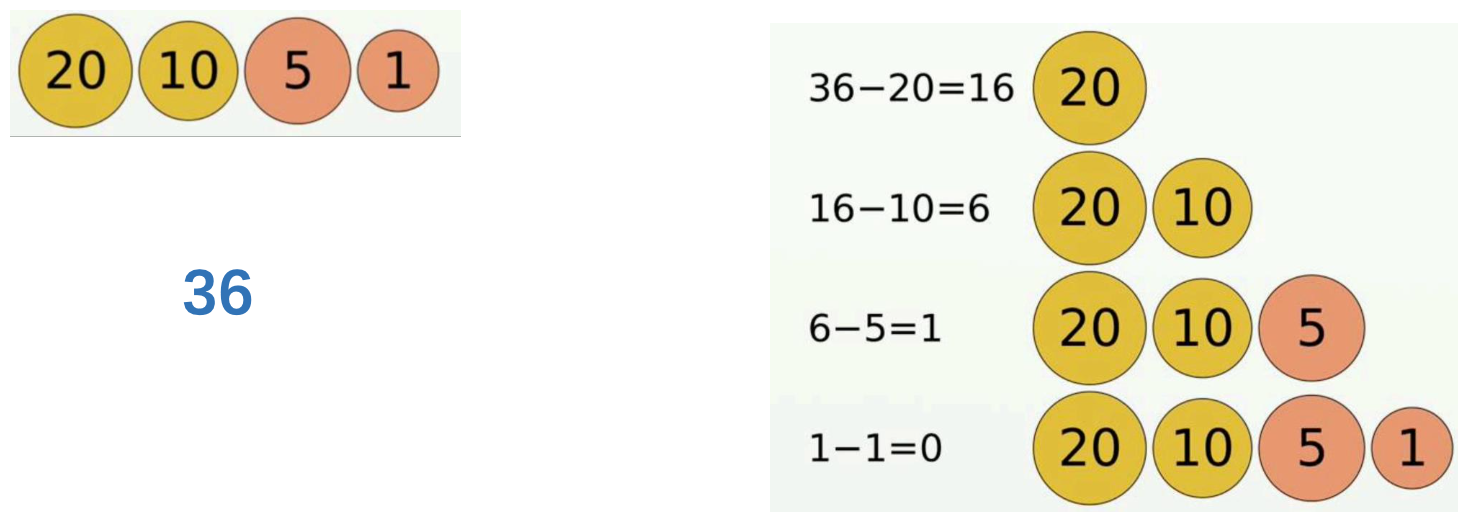

# 16. LeetCode 122. Best Time to Buy and Sell Stock II 买卖股票的最佳时机 II

You are given an integer array prices where prices[i] is the price of a given stock on the $i^{th}$ day.

On each day, you may decide to buy and/or sell the stock. You can only hold at most one share of the stock at any time. However, you can buy it then immediately sell it on the same day.

Find and return the maximum profit you can achieve.


给定一个数组 prices ，其中 prices[i] 表示股票第 i 天的价格。

在每一天，你可能会决定购买和/或出售股票。你在任何时候 最多 只能持有 一股 股票。你也可以购买它，然后在 同一天 出售。
返回 你能获得的 最大 利润 。

Example 1:

```
Input: prices = [7,1,5,3,6,4]
Output: 7
Explanation: Buy on day 2 (price = 1) and sell on day 3 (price = 5), profit = 5-1 = 4.
Then buy on day 4 (price = 3) and sell on day 5 (price = 6), profit = 6-3 = 3.
Total profit is 4 + 3 = 7.
```
在第 2 天（股票价格 = 1）的时候买入，在第 3 天（股票价格 = 5）的时候卖出, 这笔交易所能获得利润 = 5-1 = 4 。
     随后，在第 4 天（股票价格 = 3）的时候买入，在第 5 天（股票价格 = 6）的时候卖出, 这笔交易所能获得利润 = 6-3 = 3 。


Example 2:

```
Input: prices = [1,2,3,4,5]
Output: 4
Explanation: Buy on day 1 (price = 1) and sell on day 5 (price = 5), profit = 5-1 = 4.
Total profit is 4.
```

在第 1 天（股票价格 = 1）的时候买入，在第 5 天 （股票价格 = 5）的时候卖出, 这笔交易所能获得利润 = 5-1 = 4 。
     注意你不能在第 1 天和第 2 天接连购买股票，之后再将它们卖出。因为这样属于同时参与了多笔交易，你必须在再次购买前出售掉之前的股票。


Example 3:

```
Input: prices = [7,6,4,3,1]
Output: 0
Explanation: There is no way to make a positive profit, so we never buy the stock to achieve the maximum profit of 0.
```

在这种情况下, 没有交易完成, 所以最大利润为 0。

Constraints:

- $1 <= prices.length <= 3 * 10^4$
- $0 <= prices[i] <= 10^4$

## 解题思路

- 给定一个数组，它的第 i 个元素是一支给定股票第 i 天的价格。设计一个算法来计算你所能获取的最大利润。你可以尽可能地完成更多的交易（多次买卖一支股票）。注意：你不能同时参与多笔交易（你必须在再次购买前出售掉之前的股票）。

- 要求输出最大收益，这一题不止买卖一次，可以买卖多次，买卖不能在同一天内操作。

- 最大收益来源，必然是每次跌了就买入，涨到顶峰的时候就抛出。只要有涨峰就开始计算赚的钱，连续涨可以用两两相减累加来计算，两两相减累加，相当于涨到波峰的最大值减去谷底的值。这一点看通以后，题目非常简单。

In [19]:
# 122(KP) 
class Solution:
    def maxProfit (self, prices):
        if len(prices) <= 1:
            return 0
        total = 0
        for i in range(1, len(prices)):
            if prices[i] > prices[i-1]:
                total += prices[i] - prices[i-1]
        return total
if __name__ == '__main__':
    # prices = [ 6, 1, 3, 2, 4, 7]
    prices = [7, 1, 5, 3, 6,4]
    # prices = [1, 2, 3, 4, 5]
    print(Solution().maxProfit(prices))

7


# 17. LeetCode 392. Is Subsequence 判断子序列

Given two strings s and t, return true if s is a subsequence of t, or false otherwise.

A subsequence of a string is a new string that is formed from the original string by deleting some (can be none) of the characters without disturbing the relative positions of the remaining characters. (i.e., "ace" is a subsequence of "abcde" while "aec" is not).

给定字符串 s 和 t ，判断 s 是否为 t 的子序列。

字符串的一个子序列是原始字符串删除一些（也可以不删除）字符而不改变剩余字符相对位置形成的新字符串。（例如，"ace"是"abcde"的一个子序列，而"aec"不是）。

进阶：

如果有大量输入的 S，称作 S1, S2, ... , Sk 其中 k >= 10亿，你需要依次检查它们是否为 T 的子序列。在这种情况下，你会怎样改变代码？


Example 1:

```
Input: s = "abc", t = "ahbgdc"
Output: true
```

Example 2:

```
Input: s = "axc", t = "ahbgdc"
Output: false
```

Constraints:

- $0 <= s.length <= 100$
- $0 <= t.length <= 10^4$
- s and t consist only of lowercase English letters.

两个字符串都只由小写字符组成。


## 解题思路

- 给定字符串 s 和 t ，判断 s 是否为 t 的子序列。你可以认为 s 和 t 中仅包含英文小写字母。字符串 t 可能会很长（长度 ~= 500,000），而 s 是个短字符串（长度 <=100）。字符串的一个子序列是原始字符串删除一些（也可以不删除）字符而不改变剩余字符相对位置形成的新字符串。（例如，“ace"是"abcde"的一个子序列，而"aec"不是）。

- 给定 2 个字符串 s 和 t，问 s 是不是 t 的子序列。注意 s 在 t 中还需要保持 s 的字母的顺序。

- 贪心算法。



In [20]:
class Solution:
    def isSubsequence(self, s, t):
        if not s:
            return True
        i, l_s = 0, len(s)
        for v in t:
            if s[i] == v:
                i += 1
            if i == l_s:
                return True
        return False
if __name__ == '__main__':
    print(Solution().isSubsequence('dck', 'goodluck'))

True


# 18. LeetCode 263. Ugly Number 丑数

An ugly number is a positive integer whose prime factors are limited to 2, 3, and 5.

Given an integer n, return true if n is an ugly number.

判断一个数字是否是“丑陋数字”，“丑陋数字”的定义是一个正数，并且因子只包含 2，3，5 。


Example 1:

```
Input: n = 6
Output: true
Explanation: 6 = 2 × 3
```

Example 2:

```
Input: n = 1
Output: true
Explanation: 1 has no prime factors, therefore all of its prime factors are limited to 2, 3, and 5.
```

没有质因数，因此它的全部质因数是 {2, 3, 5} 的空集。习惯上将其视作第一个丑数。

Example 3:

```
Input: n = 14
Output: false
Explanation: 14 is not ugly since it includes the prime factor 7.
```

14 不是丑数，因为它包含了另外一个质因数 7 。

Constraints:

- $-2^{31} <= n <= 2^{31} - 1$


## 解题思路

判断一个数字是否是“丑陋数字”，“丑陋数字”的定义是一个正数，并且因子只包含 2，3，5 。


In [21]:
class Solution:
    def isUgly(self, num):
        if num == 0:
            return False
        for i in [2,3,5]:
            while num % i == 0:
                num /= i
        return num == 1
if __name__ == "__main__":
    print(Solution().isUgly(18))
    print(Solution().isUgly(14))

True
False


# 19. 动态规划 Dynamic Programming, DP

动态规划算法通常基于一个递推公式及一个或多个初始状态。当前子问题的解将由上一次子问题的解推出。

使用动态规划来解题只需要多项式时间复杂度，因此它比递归法、暴力法等要快许多。

状态 : 用来描述该问题的子问题的解。

状态转移方程 : 描述状态之间是如何转移的关系式。

DP 的基本原理 : 找到某个状态的最优解，然后在其帮助下，找到下一个状态的最优解。

1. 递归 + 记忆化→递推

2. 状态的定义: dp[n], dp[i][j], ...

3. 状态转移方程:dp[n] = best_of(dp[n-1], dp[n-2], ... ) 

4. 最优子结构

## Tip

```
1. 所有的例题都会做(知识点)
2. 懂得尽力将遇到的问题转化为相似的例题
3. 可以对新的问题用动态规划求解
```

## Example

1. 找最少硬币

2. 爬楼梯

3. 走方格

4. 从一维到二维的扩展

5. 矩阵相乘加括号


# 20. 找最少硬币

以 26 分递归换硬币为例:

coinValueList = [1,5,10,25]

change = 26

$$
\text { numCoins }=\min \left\{\begin{array}{l}
1+\text { numCoins }(\text { originalamount }-1) \\
1+\text { numCoins }(\text { originalamount }-5) \\
1+\text { numCoins }(\text { originalamount }-10) \\
1+\text { numCoins }(\text { originalamount }-25)
\end{array}\right.
$$

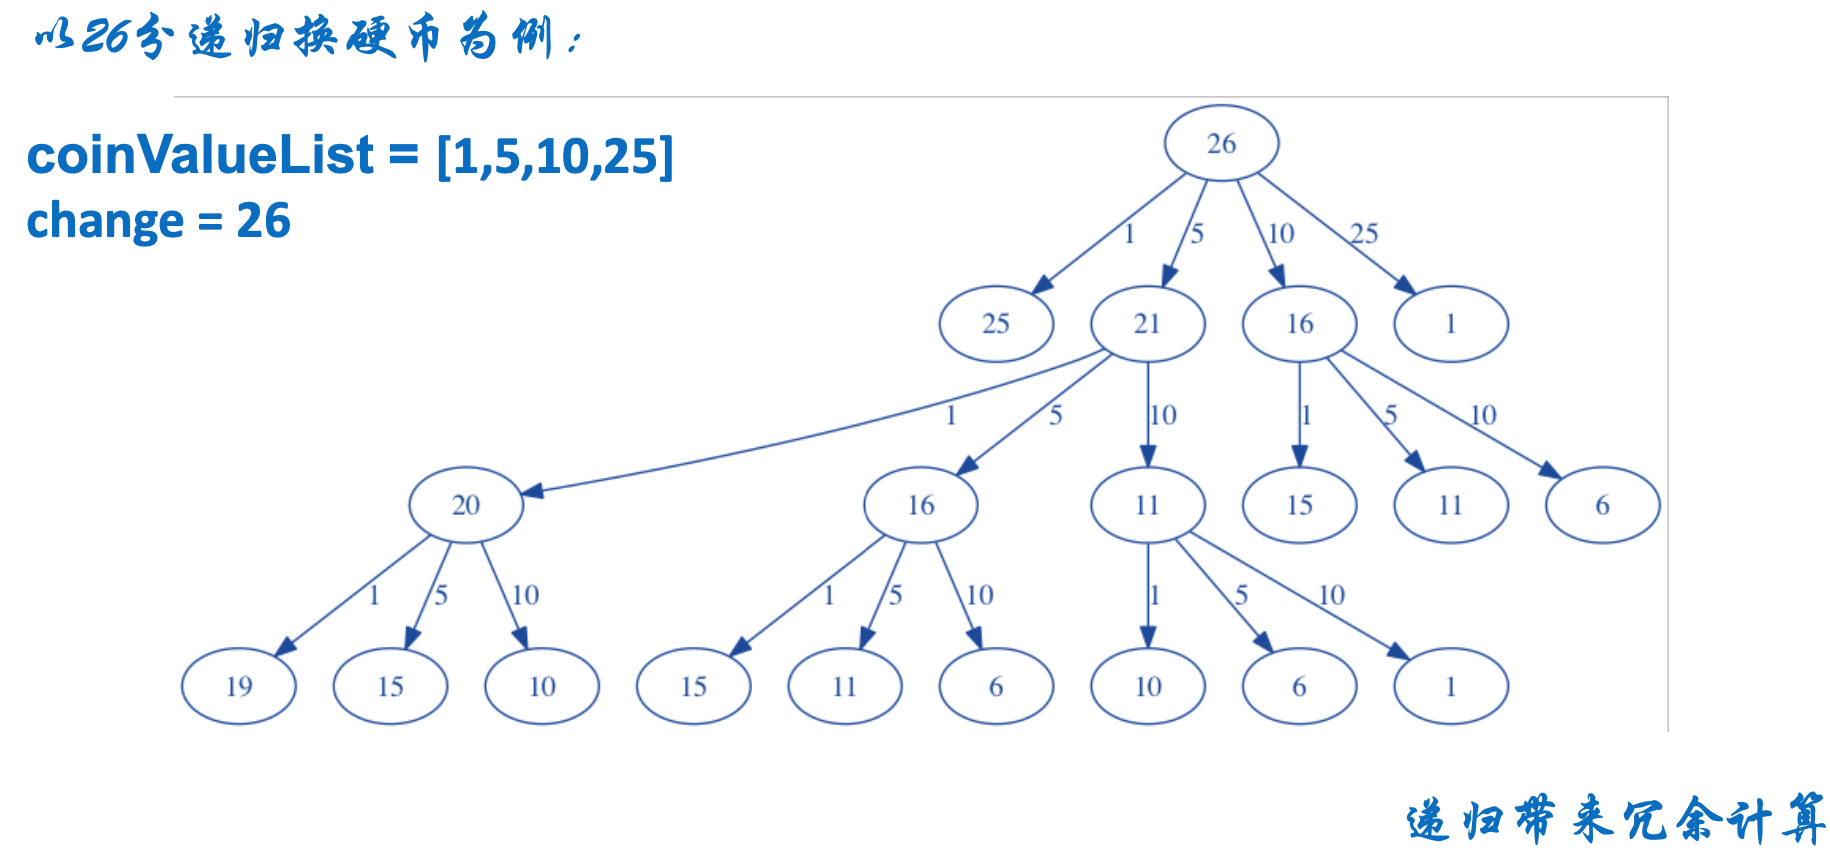

## 找最少硬币

### (1) 自上而下，递归求解

In [22]:
def recMC( coinValueList, change):
    minCoins = change
    if change in coinValueList:
        return 1
    else:
        for i in [c for c in coinValueList if c <= change]:
            numCoins = 1 + recMC(coinValueList, change - i)
            if numCoins < minCoins:
                minCoins = numCoins
    return minCoins

### (2) 加入“备忘录”，去除冗余的递归求解

In [23]:
def recMC(coinValueList, change, knownResults):
    minCoins = change
    if change in coinValueList:
        knownResults[change] = 1
        return 1
    elif knownResults[change] > 0:
        return knownResults[change]
    else:
        for i in [c for c in coinValueList if c <= change]:
            numCoins = 1 + recDC(coinValueList, change - i, knownResults)
            if numCoins < minCoins:
                minCoins = numCoins
                knownResults[change] = minCoins
    return minCoins

### (3) 自下而上，动态规划求解，状态转移方程

$$
\text { numCoins }=\min \left\{\begin{array}{l}
1+\text { numCoins }(\text { originalamount }-1) \\
1+\text { numCoins }(\text { originalamount }-5) \\
1+\text { numCoins }(\text { originalamount }-10) \\
1+\text { numCoins }(\text { originalamount }-25)
\end{array}\right.
$$

In [24]:
def dpMakeChange(coinValueList, change, minCoins):
    for cents in range(change + 1):
        coinCount = cents
        for j in [c for c in coinValueList if c <= cents]:
            if minCoins[cents - j] + 1 < coinCount:
                coinCount = minCoins[cents - j] + 1
        minCoins[cents] = coinCount
    return minCoins[change]

### (4) 带自动找零功能，动态规划求解

In [25]:
def dpMakeChange(coinValueList, change, minCoins, coinsUsed):
    for cents in range(change + 1):
        coinCount = cents
        newCoin = 1
        for j in [c for c in coinValueList if c <= cents]:
            if minCoins[cents - j] + 1 < coinCount:
                coinCount = minCoins[cents - j] + 1
                newCoin = j
        minCoins[cents] = coinCount
        coinsUsed[cents] = newCoin
    return minCoins[change]
def printCoins(coinsUsed, change):
    coin = change
    while coin > 0:
        thisCoin = coinsUsed[coin]
        print(thisCoin)
        coin = coin - thisCoin

# 21. 爬楼梯

## LeetCode 70. Climbing Stairs 爬楼梯

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

假设你正在爬楼梯。需要 n 阶你才能到达楼顶。

每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢？

Example 1:

```
Input: n = 2
Output: 2
Explanation: There are two ways to climb to the top.
1. 1 step + 1 step
2. 2 steps
```

解释：有两种方法可以爬到楼顶。
1. 1 阶 + 1 阶
2. 2 阶

Example 2:

```
Input: n = 3
Output: 3
Explanation: There are three ways to climb to the top.
1. 1 step + 1 step + 1 step
2. 1 step + 2 steps
3. 2 steps + 1 step
```

解释：有三种方法可以爬到楼顶。
1. 1 阶 + 1 阶 + 1 阶
2. 1 阶 + 2 阶
3. 2 阶 + 1 阶

Constraints:

- 1 <= n <= 45


## 解题思路

- 假设你正在爬楼梯。需要 n 阶你才能到达楼顶。每次你可以爬 1 或 2 个台阶。你有多少种不同的方法可以爬到楼顶呢？注意：给定 n 是一个正整数。

- 简单的 DP，经典的爬楼梯问题。一个楼梯可以由 n-1 和 n-2 的楼梯爬上来。

- 这一题求解的值就是斐波那契数列。



In [26]:
# 70 爬樓梯 (KP)
class Solution:
    def climbStairs(self, n):
        prev, current = 0, 1
        for i in range(n):
            prev, current = current, prev + current
        return current

##  爬樓梯，状态转移方程，空间节省策略

$$𝑑𝑝[𝑛] = 𝑑𝑝 [𝑛 − 1] + 𝑑𝑝 [𝑛 − 2]$$

# 22. LeetCode 62. Unique Paths 不同路径

There is a robot on an m x n grid. The robot is initially located at the top-left corner (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). The robot can only move either down or right at any point in time.

Given the two integers m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.

The test cases are generated so that the answer will be less than or equal to $2 * 10^9$

一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为 “Start” ）。

机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish” ）。

问总共有多少条不同的路径？

Example 1:

```
Input: m = 3, n = 7
Output: 28
```

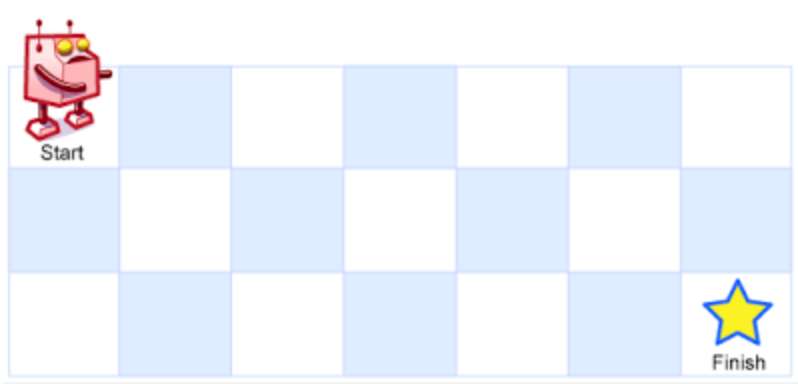

Example 2:

```
Input: m = 3, n = 2
Output: 3
Explanation: From the top-left corner, there are a total of 3 ways to reach the bottom-right corner:
1. Right -> Down -> Down
2. Down -> Down -> Right
3. Down -> Right -> Down
```

从左上角开始，总共有 3 条路径可以到达右下角。
1. 向右 -> 向下 -> 向下
2. 向下 -> 向下 -> 向右
3. 向下 -> 向右 -> 向下


Example 3:

```
输入：m = 7, n = 3
输出：28
```


Example 4:

```
输入：m = 3, n = 3
输出：6
```

Constraints:

- 1 <= m, n <= 100

- 题目数据保证答案小于等于 $2 * 10^9$


## 解题思路

- 一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为“Start” ）。机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为“Finish”）。问总共有多少条不同的路径？

- 这是一道简单的 DP 题。输出地图上从左上角走到右下角的走法数。

- 由于机器人只能向右走和向下走，所以地图的第一行和第一列的走法数都是 1，地图中任意一点的走法数是 dp[i][j] = dp[i-1][j] + dp[i][j-1]


In [27]:
# 走方格
# 62
class Solution(object):
    def uniquePaths(self, m, n):
        dp = [[0 for _ in range(n)] for _ in range(m)]
        for index in range(m):
            dp[index][0] = 1
        for index in range(n):
            dp[0][index] = 1
        for index_i in range(1, m): 
            for index_j in range(1, n):
                dp[index_i][index_j] = dp[index_i-1][index_j] + dp[index_i][index_j-1]
        return dp[m-1][n-1]
if __name__ == "__main__":
    print(Solution().uniquePaths(3,2))
    print(Solution().uniquePaths(9,4))

3
165


# 23. 从一维到二维的扩展

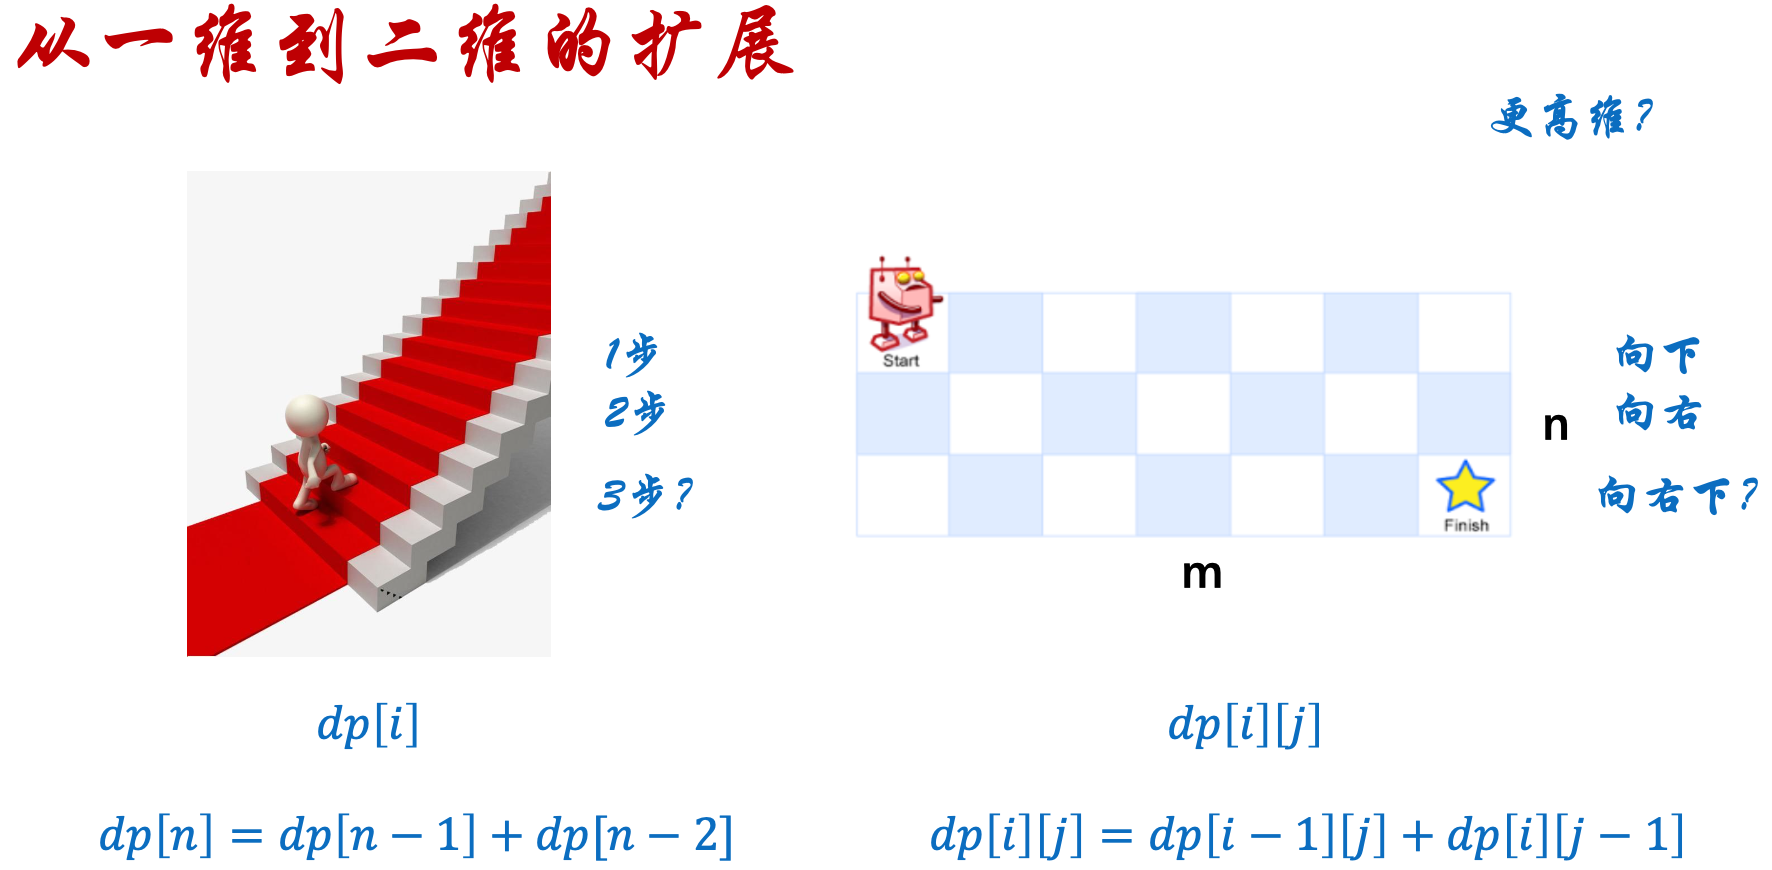

## LeetCode 63. Unique Paths II 不同路径 II

A robot is located at the top-left corner of a m x n grid (marked 'Start' in the diagram below).

The robot can only move either down or right at any point in time. The robot is trying to reach the bottom-right corner of the grid (marked 'Finish' in the diagram below).

Now consider if some obstacles are added to the grids. How many unique paths would there be?

An obstacle and space is marked as 1 and 0 respectively in the grid.

一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为 “Start” ）。

机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为 “Finish”）。

现在考虑网格中有障碍物。那么从左上角到右下角将会有多少条不同的路径？

网格中的障碍物和空位置分别用 1 和 0 来表示。

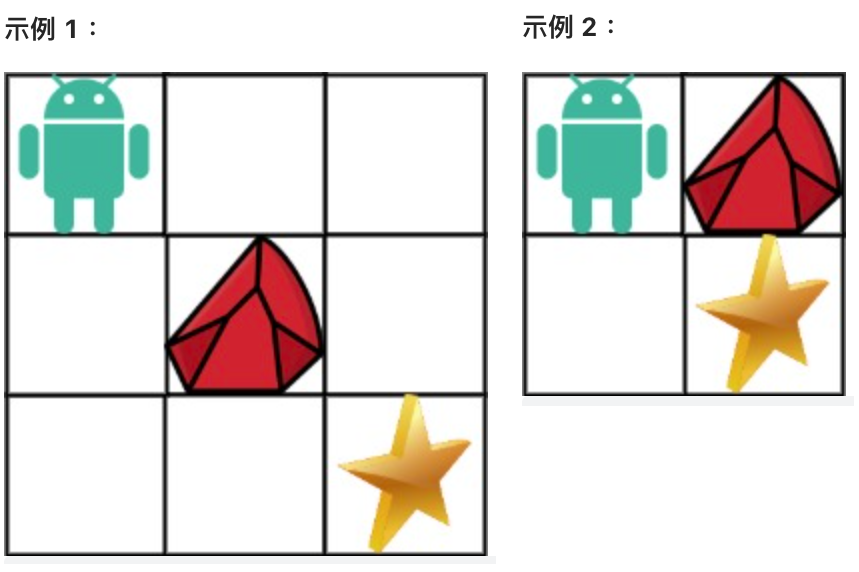

Example 1:

```
Input: obstacleGrid = [[0,0,0],[0,1,0],[0,0,0]]
Output: 2
Explanation: There is one obstacle in the middle of the 3x3 grid above.
There are two ways to reach the bottom-right corner:
1. Right -> Right -> Down -> Down
2. Down -> Down -> Right -> Right
```

解释：3x3 网格的正中间有一个障碍物。
从左上角到右下角一共有 2 条不同的路径：
1. 向右 -> 向右 -> 向下 -> 向下
2. 向下 -> 向下 -> 向右 -> 向右


Example 2:

```
Input: obstacleGrid = [[0,1],[0,0]]
Output: 1
```


Constraints:

- m == obstacleGrid.length
- n == obstacleGrid[i].length
- 1 <= m, n <= 100
- obstacleGrid[i][j] is 0 or 1.



## 解题思路

- 一个机器人位于一个 m x n 网格的左上角 （起始点在下图中标记为“Start” ）。机器人每次只能向下或者向右移动一步。机器人试图达到网格的右下角（在下图中标记为“Finish”）。现在考虑网格中有障碍物。那么从左上角到右下角将会有多少条不同的路径？

- 这一题是第 62 题的加强版。也是一道考察 DP 的简单题。

- 这一题比第 62 题增加的条件是地图中会出现障碍物，障碍物的处理方法是 dp[i][j]=0。

- 需要注意的一种情况是，起点就是障碍物，那么这种情况直接输出 0 。


In [28]:
class Solution(object):
    def uniquePathsWithObstacles(self, obstacleGrid):
        m, n = len(obstacleGrid), len(obstacleGrid[0])
        dp = [[0 for _ in range(n)] for _ in range(m)]

        if obstacleGrid[0][0] == 1 or obstacleGrid[m-1][n-1] == 1: 
            return 0
        dp[0][0] = 1
        for index in range(1, m):
            if obstacleGrid[index][0] == 1:
                dp[index][0] = 0
            else:
                dp[index][0] = dp[index-1][0]
        for index in range(1, n):
            if obstacleGrid[0][index] == 1:
                dp[0][index] = 0
            else:
                dp[0][index] = dp[0][index-1]
        for index_i in range(1, m):
            for index_j in range(1, n):
                if obstacleGrid[index_i][index_j] == 1:
                    dp[index_i][index_j] = 0
                else:
                    dp[index_i][index_j] = dp[index_i-1][index_j] + dp[index_i][index_j-1] 
        return dp[m-1][n-1]

# 24. 矩阵相乘加括号

## 描述:

设 $A_1, A_2, ... , A_n$ 为矩阵序列，$A_i$ 为 $P_{i-1} \times P_{i}$ 阶矩阵，$i = 1,2,...,n$.

确定 乘法顺序使得元素相乘的总次数最少.

## 输入:

向量 $P = <P_0, P_1, ... , P_n>$，n 个矩阵的行数、列数 实例:

$$P = <10, 100, 5, 50>$$

$$A_1: 10 \times 100, A_2: 100 \times 5, A_3: 5 \times 50$$

## 括号位置不同，相乘总次数不同:

$$
(A_{1}A_{2})A_{3}: 10 \times 100 \times 5 + 10 \times 5 \times 50 = 7500 
A_{1}(A_{2}A_{3}): 10 \times 100 \times 50 + 100 \times 5 \times 50 = 75000
$$

## 枚举算法:

加n个括号的方法有 $\frac{1}{n+1}\left(\begin{array}{c}2 n \\ n\end{array}\right)$ 是一个Catalan数，是指数级别:

搜索空间规模

$$
\begin{aligned}
W(n) &=\Omega\left(\frac{1}{n+1} \frac{(2 n) !}{n ! n !}\right)=\Omega\left(\frac{1}{n+1} \frac{\sqrt{2 \pi 2 n}\left(\frac{2 n}{e}\right)^{2 n}}{\sqrt{2 \pi n}\left(\frac{n}{e}\right)^{n \sqrt{2 \pi n}\left(\frac{n}{e}\right)^{n}}}\right) \\
&=\Omega\left(\frac{1}{n+1} \frac{n^{\frac{1}{2}} 2^{2 n} n^{2 n} e^{n} e^{n}}{e^{2 n} n^{\frac{1}{2}} n^{n} n^{\frac{1}{2}} n^{n}}\right)=\Omega\left(2^{2 n} / n^{\frac{3}{2}}\right)
\end{aligned}
$$

## 确定子问题的边界:

输入 $P=< P_0, P_1, ..., P_n> , A_{i..j}$ 表示乘积 $A_{i}A_{i+1}...A{j}$ 的结果，其最后一次相乘是 $A_{i..j} = A_{i..k} A_{k+1..j}$

## 确定优化函数和递推方程:

$m[i,j]$ 表示得到 $A_{i..j}$ 的最少的相乘次数，则递推方程和初值.

$$
m[i, j]= \begin{cases}0 & i=j \\ \min _{i \leq k<j}\left\{m[i, k]+m[k+1, j]+P_{i-1} P_{k} P_{j}\right\} & i<j\end{cases}
$$


In [29]:
class Matrix:
    def __init__(self, row_num=0, col_num=0, matrix=None):
        if matrix != None:
            self.row_num = len(matrix)
            self.col_num = len(matrix[0])
        else:
            self.row_num = row_num
            self.col_num = col_num
        self.matrix = matrix

In [30]:
def matrix_chain(matrixs):
    matrix_num = len(matrixs)
    m = [[0 for j in range(matrix_num)] for i in range(matrix_num)]
    for interval in range(1, matrix_num + 1): 
        for i in range(matrix_num - interval):
            j = i + interval
            m[i][j] = m[i][i] + m[i + 1][j] + matrixs[i].row_num * matrixs[i + 1].row_num * matrixs[j].col_num
            for k in range(i + 1, j):
                temp = m[i][k] + m[k + 1][j] + matrixs[i].row_num * matrixs[k + 1].row_num * matrixs[j].col_num
                if temp < m[i][j]:
                    m[i][j] = temp 
    return m[0][matrix_num - 1]

# Test
matrixs = [Matrix(30, 35), Matrix(35, 15), Matrix(15, 5), Matrix(5, 10), Matrix(10, 20)]
# print(matrixs)
result = matrix_chain(matrixs)
print(result)

11875


输入 $P= <30, 35, 15, 5, 10, 20>, n=5$，矩阵链:$A_{1}A_{2}A_{3}A_{4}A{5}$，其中 $A_{1}$: $30 \times 35$，$A_{2}$: $35 \times 15$，$A_{3}$: $15 \times 5$，$A_{4}$: $5 \times 10$，$A_{5}$: $10 \times 20$

## 备忘录:

| r | m[1,n] | m[2,n] | m[3,n] | m[4,n] | m[5,n] |
| - | - | - | - | - | - |
| r=1 | m[1,1]=0 | m[2,2]=0 | m[3,3]=0 | m[4,4]=0 | m[5,5]=0 |
| r=2 | m[1,2]=15750 | m[2,3]=2625 | m[3,4]=750 | m[4,5]=1000 |  |
| r=3 | m[1,3]=7875 | m[2,4]=4375 | m[3,5]=2500 |   |   |
| r=4 | m[1,4]=9375 | m[2,5]=7125 |   |   |   |
| r=5 | m[1,5]=11875 |   |   |   |   |

## 解: 

$$(A_{1} (A_{2} A_{3})) (A_{4}A_{5})$$